In [7]:
import pandas as pd

job_postings_fact = pd.read_csv('C:\\Users\\ethan\\Downloads\\job_postings_fact.csv')
company_dim = pd.read_csv('C:\\Users\\ethan\\[OLD] Python Projects\\SQL_Projects\\all_folders\\csv_files\\company_dim.csv')
skills_dim = pd.read_csv("C:\\Users\\ethan\\[OLD] Python Projects\\SQL_Projects\\all_folders\\csv_files\\skills_dim.csv")
skills_jobs_dim = pd.read_csv("C:\\Users\\ethan\\[OLD] Python Projects\\SQL_Projects\\all_folders\\csv_files\\skills_job_dim.csv")

In [8]:
job_postings_fact.head()

,job_id,company_id,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg
0,0,0,Data Analyst,Marketing Data Analyst,Anywhere,via LinkedIn,Full-time,True,Serbia,2023-09-25 17:46:06,False,False,Serbia,NaN,NaN,NaN
1,55,1,Cloud Engineer,Storage and Virtualization Engineer,"Kuwait City, Kuwait",via Trabajo.org,Full-time,False,Kuwait,2023-07-30 17:49:18,True,False,Kuwait,NaN,NaN,NaN
2,66,2,Data Analyst,Data Analyst et Scientist F/H,"Paris, France",via Emplois Trabajo.org,Full-time,False,France,2023-07-28 17:28:01,False,False,France,NaN,NaN,NaN
3,76,3,Data Engineer,Data Engineer,"Denver, CO",via LinkedIn,Contractor,False,"Illinois, United States",2023-04-03 17:14:45,False,False,United States,hour,NaN,70.0
4,81,4,Data Engineer,Data Engineer,Anywhere,via LinkedIn,Contractor,True,Canada,2023-03-25 17:25:20,False,False,Canada,NaN,NaN,NaN


In [16]:
# Step 1: Remove rows with missing 'salary_year_avg' values
job_postings_fact = job_postings_fact.dropna(subset=['salary_year_avg'])

job_postings_fact['salary_year_avg'] = job_postings_fact['salary_year_avg'].astype(int) 

# Step 2: Filter for job postings in the United Kingdom
job_postings_fact_UK = job_postings_fact[job_postings_fact["job_country"] == "United Kingdom"]

# Step 3: Sort by 'salary_year_avg' in descending order and select specific columns
result = job_postings_fact_UK.sort_values(["salary_year_avg"], ascending=False)[['job_id', 'job_title', 'job_country', 'salary_year_avg']]

result

,job_id,job_title,job_country,salary_year_avg
436534,1540095,Head of Data Engineering,United Kingdom,249000
192494,565034,Real World Data Science Manager,United Kingdom,205000
352705,1812962,Deep Learning Research Engineer,United Kingdom,200000
366607,401338,Data Science Manager,United Kingdom,192000
45606,97173,Data Science Manager,United Kingdom,192000
...,...,...,...,...
580008,57239,Data Scientist,United Kingdom,31500
326564,450632,"Senior Director, Head of Business Intelligence",United Kingdom,30000
170861,1185135,Data Analyst,United Kingdom,30000
149524,265915,Analyste en intelligence d'affaires (hybride)/...,United Kingdom,30000


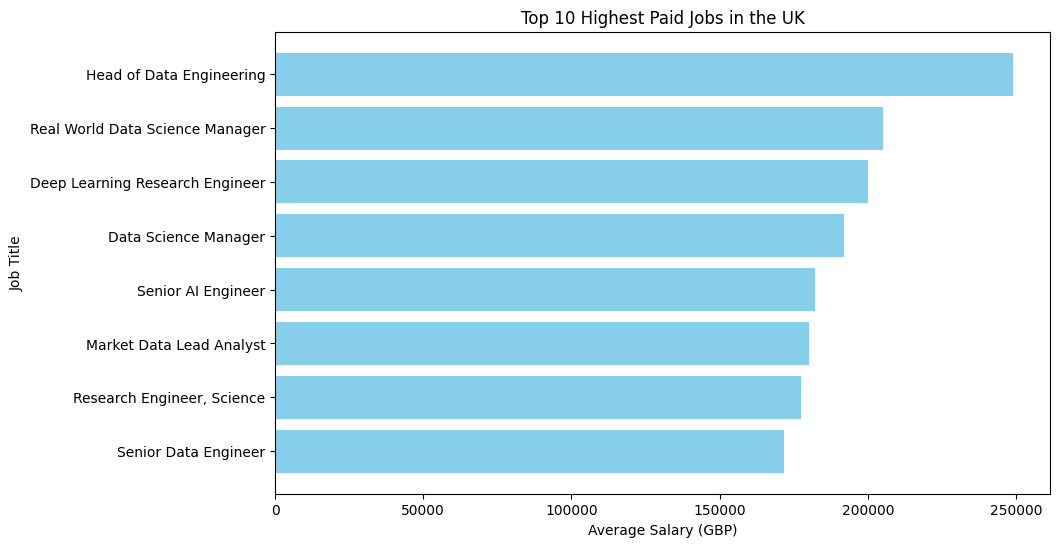

In [17]:
import matplotlib.pyplot as plt

# Assuming `job_postings_fact_UK` is already filtered and sorted as shown previously

# Step 1: Select the top 10 highest-paid jobs
top_10_jobs = job_postings_fact_UK.sort_values("salary_year_avg", ascending=False).head(10)

# Step 2: Create a bar chart
plt.figure(figsize=(10, 6))  # Set the figure size for better readability
plt.barh(top_10_jobs['job_title'], top_10_jobs['salary_year_avg'], color='skyblue')  # Horizontal bar chart for better visualization

# Step 3: Add labels and title
plt.xlabel('Average Salary (GBP)')
plt.ylabel('Job Title')
plt.title('Top 10 Highest Paid Jobs in the UK')

# Step 4: Invert the y-axis to have the highest value at the top
plt.gca().invert_yaxis()

# Step 5: Show the plot
plt.show()


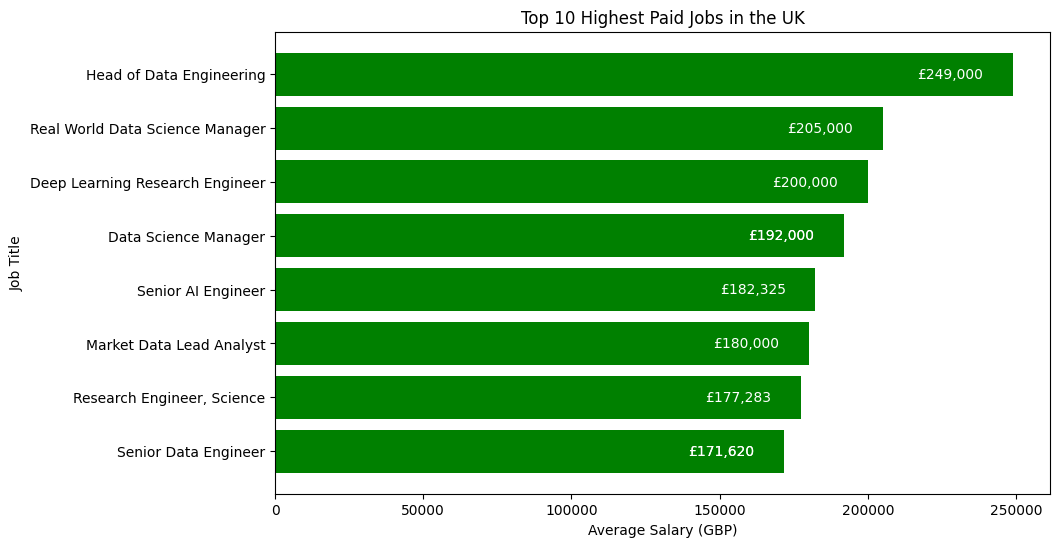

In [21]:
import matplotlib.pyplot as plt

# Assuming `job_postings_fact_UK` is already filtered and sorted as shown previously

# Step 1: Select the top 10 highest-paid jobs
top_10_jobs = job_postings_fact_UK.sort_values("salary_year_avg", ascending=False).head(10)

# Step 2: Create a bar chart
plt.figure(figsize=(10, 6))  # Set the figure size for better readability
bars = plt.barh(top_10_jobs['job_title'], top_10_jobs['salary_year_avg'], color='green')  # Horizontal bar chart for better visualization

# Step 3: Add labels and title
plt.xlabel('Average Salary (GBP)')
plt.ylabel('Job Title')
plt.title('Top 10 Highest Paid Jobs in the UK')

# Step 4: Add the salary numbers within the bars
for bar in bars:
    plt.text(
        bar.get_width() - 10000,  # Position the text slightly before the end of the bar for readability
        bar.get_y() + bar.get_height()/2,  # Center the text vertically within the bar
        f'£{int(bar.get_width()):,}',  # Format the number with commas and add currency symbol
        va='center', ha='right', color='white', fontsize=10  # Adjust alignment, color, and font size
    )

# Step 5: Invert the y-axis to have the highest value at the top
plt.gca().invert_yaxis()

# Step 6: Show the plot
plt.show()
